# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [9]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head(9)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


In [10]:
#оценим качество и размер выборки
data.info() 

#заменим категориальные строчные данные на числовые
data['sex'] = data['Gender']
data.loc[data['Gender'] == 'Female', 'sex'] = 0
data.loc[data['Gender'] == 'Male', 'sex'] = 1
data.drop(columns='Gender',inplace=True)

# для заполнения NA значений в Albumin_and_Globulin_Ratio используем моду
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0], inplace = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


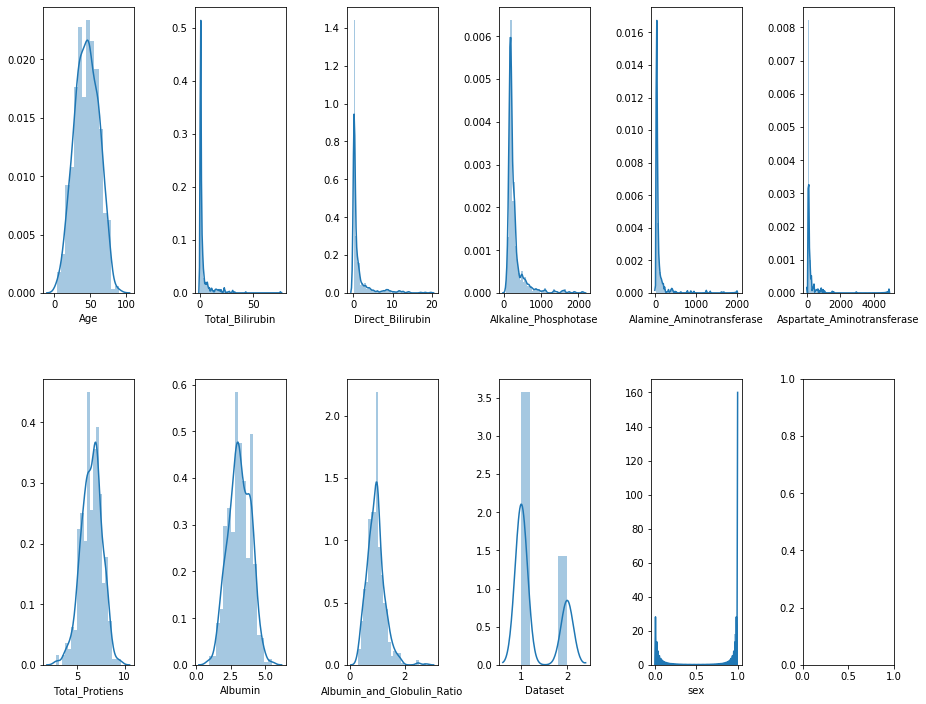

In [11]:
#посмотрим плотности вероятности
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(13, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=1.5, w_pad=1, h_pad=5.0)
plt.show()


C:\Users\galinov.ea\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\galinov.ea\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


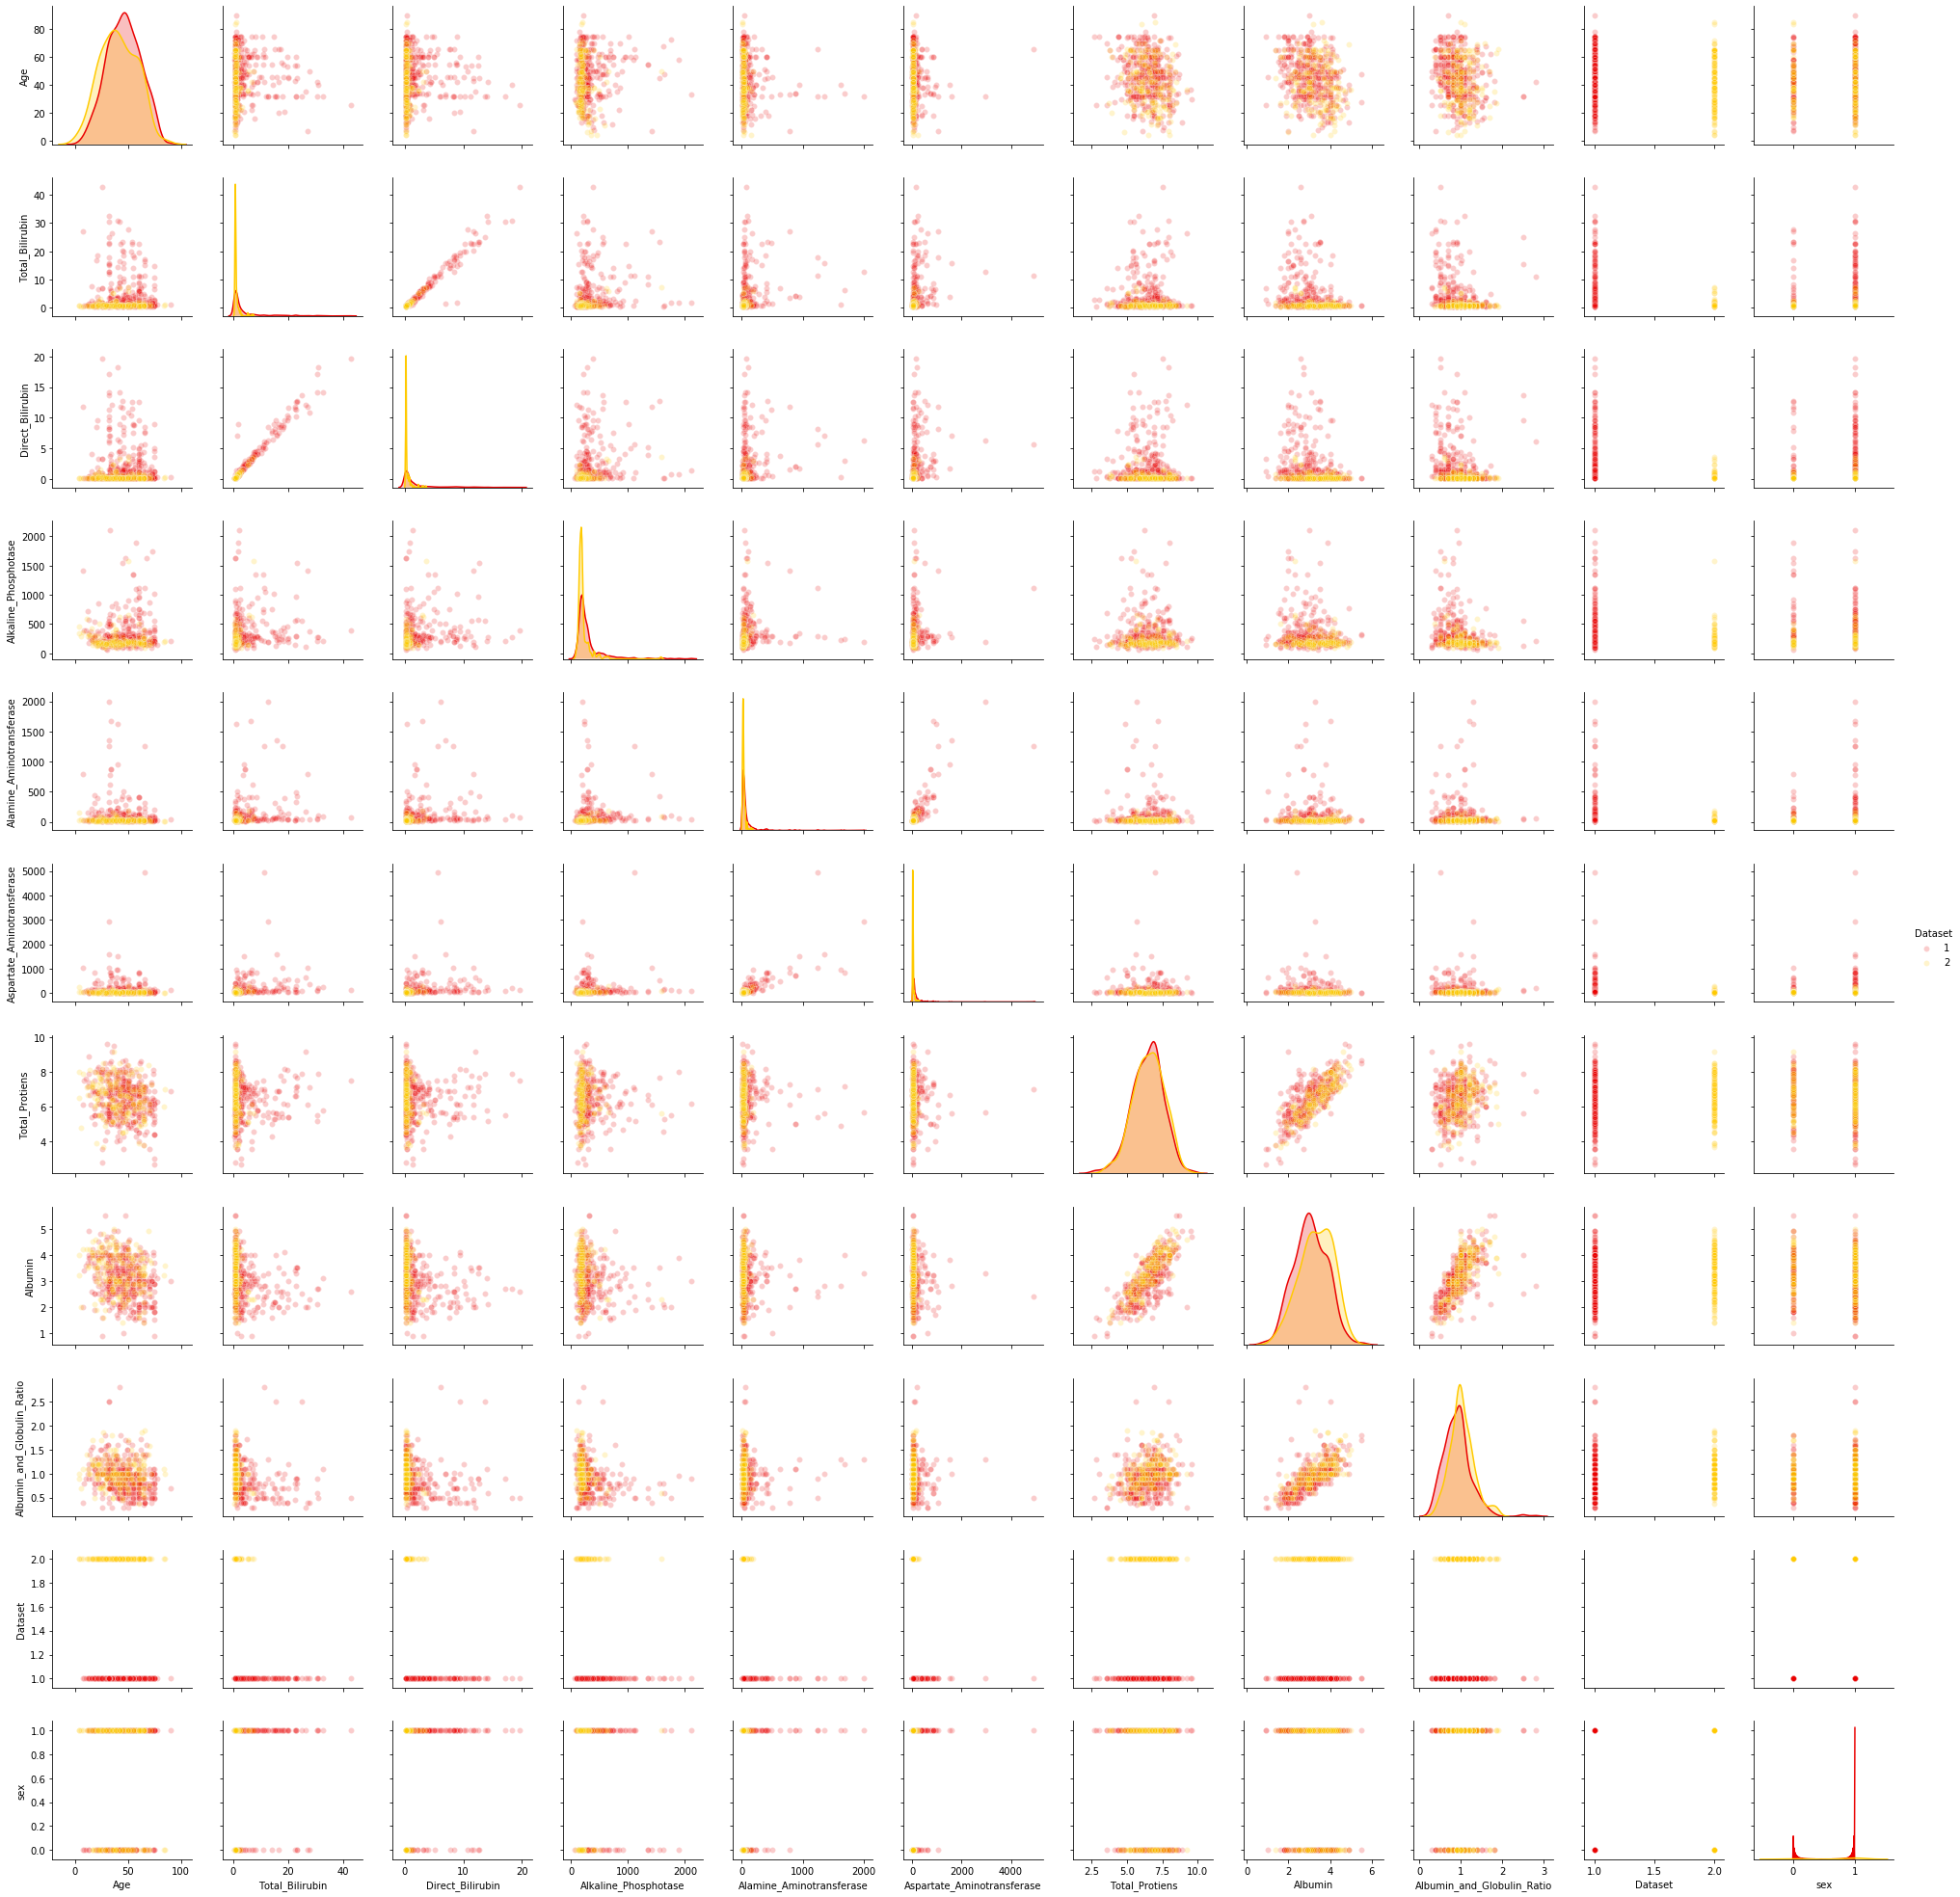

In [84]:
sns.pairplot(data=data,hue='Dataset',plot_kws={'alpha':0.2},palette='hot')
plt.show()

Нормальное распределение у Age, Total_Proteins, Albumin, Albumin_and_Globulin_Ratio (а значит заполнение модой рабочий вариант)
Биномиальное - Dataset, sex
Геометрическое - Total_Bilirubin, Direct_Bilirubin, Alamine_Aminotransferase, Aspartate_Aminotransferase
Лог-нормальное - Alkaline_Phosphotase

# Задание 1
Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

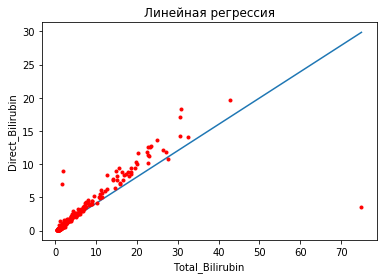

In [12]:
from sklearn.linear_model import LinearRegression
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Total_Bilirubin).reshape(-1,1), Direct_Bilirubin)

plt.xlabel('Total_Bilirubin')
plt.ylabel('Direct_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Total_Bilirubin), max(Total_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Total_Bilirubin, Direct_Bilirubin, 'r.')
plt.show()

In [13]:
display(data[['Total_Bilirubin','Direct_Bilirubin']].head(3))
print(model.predict(np.array([0.7]).reshape(-1, 1)))
print(model.predict(np.array([10.9]).reshape(-1, 1)))
print(model.predict(np.array([7.3]).reshape(-1, 1)))
# можно улучшить модель, сократив ошибку за счет удаления выброса по параметру Total_Bilirubin

,Total_Bilirubin,Direct_Bilirubin
0,0.7,0.1
1,10.9,5.5
2,7.3,4.1


[0.45807341]
[4.49298903]
[3.06890116]


In [14]:
#в переменной data1 посмотрим на качество линейной регресси без выброса
data1 = data
data1.drop(data1[data1.Total_Bilirubin == 75.0].index, inplace=True)

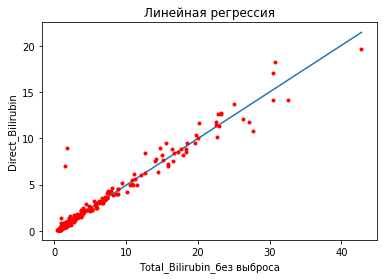

In [15]:
Direct_Bilirubin1 = data1['Direct_Bilirubin']
Total_Bilirubin1 = data1['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Total_Bilirubin1).reshape(-1,1), Direct_Bilirubin1)

plt.xlabel('Total_Bilirubin_без выброса')
plt.ylabel('Direct_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Total_Bilirubin1), max(Total_Bilirubin1), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Total_Bilirubin1, Direct_Bilirubin1, 'r.')
plt.show()

In [16]:
#проверим, стали ли предсказания модели точнее (стали)
display(data1[['Total_Bilirubin','Direct_Bilirubin']].head(3))
print(model.predict(np.array([0.7]).reshape(-1, 1)))
print(model.predict(np.array([10.9]).reshape(-1, 1)))
print(model.predict(np.array([7.3]).reshape(-1, 1)))

,Total_Bilirubin,Direct_Bilirubin
0,0.7,0.1
1,10.9,5.5
2,7.3,4.1


[0.23324197]
[5.38034246]
[3.56371876]


# Задание 2
Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

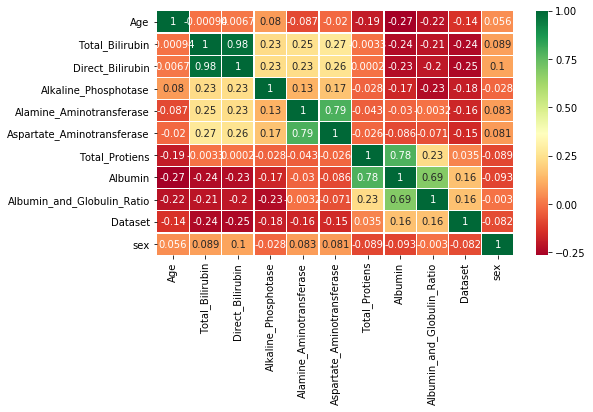

In [17]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,4.5)
plt.show()

Мартица корреляции показывает, что Dataset имеет наиболее сильную корреляцию с Total_Bilirubin, Direct_Bilirubin (однако их взаимная корреляция 0.98, поэтому не имеет смысла их одновременное использование в модели), Alkaline_Phosphotase.


In [18]:
Direct_Bilirubin = data['Direct_Bilirubin']
Alkaline_Phosphotase = data['Alkaline_Phosphotase']
Dataset = data['Dataset']
x = np.vstack([np.array(Direct_Bilirubin), np.array(Alkaline_Phosphotase)]).T
y = np.array(Dataset)
model = LinearRegression().fit(x, y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.410793343824534
slope: [-0.03445728 -0.00025049]


(582, 1)
(582,)


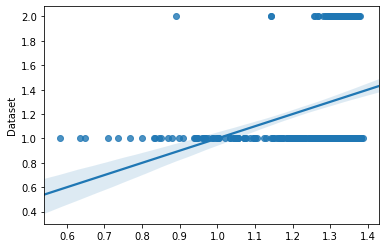

In [20]:
prediction = pd.DataFrame(data = model.predict(x))
Dataset = data['Dataset']
sns.regplot(x= prediction, y=Dataset,data=data, fit_reg=True)
plt.show()
#качество модели линейной регресси для поиска категориальных данных очень низкое

# Задание 3
Посчитать квартили для всех колонок. 

In [36]:
data.describe().T[['25%','50%','75%']]

,25%,50%,75%
Age,33.00,45.000,58.00
Total_Bilirubin,0.80,1.000,2.60
Direct_Bilirubin,0.20,0.300,1.30
Alkaline_Phosphotase,175.25,208.000,298.00
Alamine_Aminotransferase,23.00,35.000,60.75
Aspartate_Aminotransferase,25.00,42.000,87.00
Total_Protiens,5.80,6.600,7.20
Albumin,2.60,3.100,3.80
Albumin_and_Globulin_Ratio,0.70,0.955,1.10
Dataset,1.00,1.000,2.00


# Задание 4 
Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

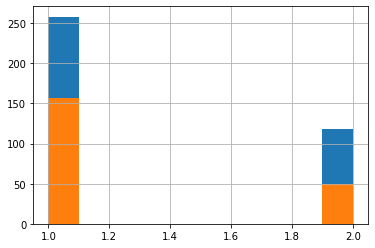

In [88]:
data_younger = data[data['Age'] <= 50].reset_index()['Dataset']
data_elder = data[data['Age'] > 50].reset_index()['Dataset']

data_younger.hist()
data_elder.hist()

In [89]:
frame = { 'data_younger': data_younger, 'data_elder': data_elder} 
data2 = pd.DataFrame(frame) 
data2.describe().T[['mean','50%']]


,mean,50%
data_younger,1.313830,1.0
data_elder,1.237864,1.0


Медиана равна в двух выборках, значит в обеих половина пациентов - здоровые.
При этом среднее значение в выборке людей 50+ ниже, то есть количество "двоек", т.е. больных пациентов

# Задание 5
Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [105]:
sick = data[data['Dataset']==1].reset_index()['Total_Bilirubin']
stats.ttest_1samp(sick, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.6680227101132354, pvalue=0.00792947118580456)

P-value меньше стандартной альфа ошибки, поэтому принимаем гипотезу о статистически значимом отличии уровня Total_Bilirubin для больных людей.

# Задание 6
Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [106]:
healthy = data[data['Dataset']==2].reset_index()['Total_Bilirubin']

stats.ttest_ind(sick, healthy)

Ttest_indResult(statistic=5.8649857449009275, pvalue=7.548849823227222e-09)

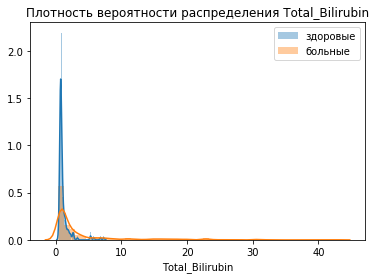

In [107]:
sns.distplot(healthy)
sns.distplot(sick)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['здоровые', 'больные'])
plt.show()

In [114]:
display(pd.DataFrame({'healthy': healthy}).describe())
display(pd.DataFrame({'sick': sick}).describe())

,healthy
count,167.000000
mean,1.142515
std,1.004472
min,0.500000
25%,0.700000
50%,0.800000
75%,1.100000
max,7.300000


,sick
count,415.000000
mean,3.993735
std,6.246816
min,0.400000
25%,0.800000
50%,1.400000
75%,3.600000
max,42.800000


Выборки имеют схожесть в части плотности распределения, однако по основным статистическим параметрам есть серьезное отличие, что подтверждается pvalue=7.548849823227222e-09

# Задание 7
Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [130]:
def age_group(age):
    if age<=30:
        return 1
    elif age<=55:
        return 2
    else:
        return 3
    
data['age_group'] = data.Age.apply(age_group)

AgeGroup1 = data[data['age_group']==1]['Dataset']
AgeGroup2 = data[data['age_group']==2]['Dataset']
AgeGroup3 = data[data['age_group']==3]['Dataset']

stats.f_oneway(AgeGroup1, AgeGroup2, AgeGroup3)

F_onewayResult(statistic=8.873140205953163, pvalue=0.00016007372903832458)

pvalue=0.00016, принимаем гипотезу о различии групп по критерию Dataset

Вопросы задавать на почту yustiks@gmail.com